In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150
import tqdm

In [2]:
import scipy.special as sps
import numpy as np
import math
from maoud.sampling import rejection_sampling
from maoud.distributions import AlphaMu

Text(0.5,1,'$\\alpha-\\mu$ density')

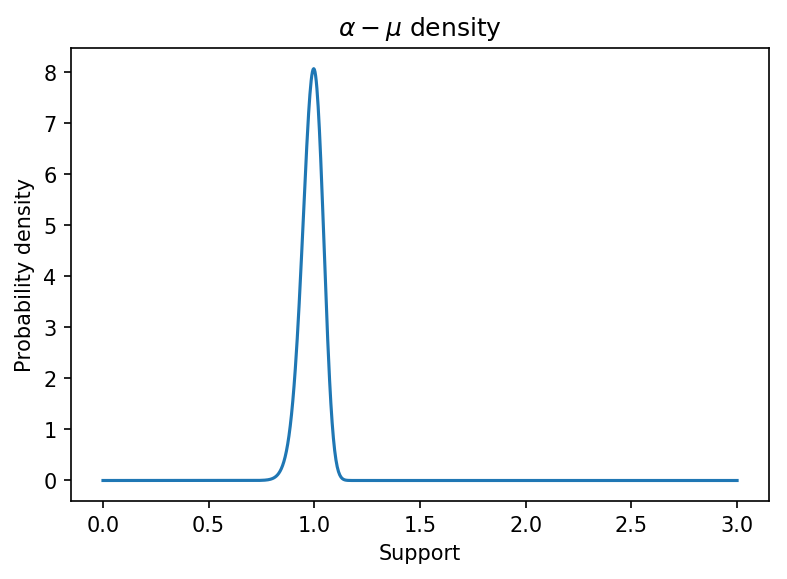

In [10]:
x = np.linspace(1e-3, 3., 1000)
alpha, mu = 10, 4.25
nakagami = AlphaMu(alpha, mu)
pdf = nakagami.pdf(x)
plt.plot(x, pdf)
plt.ylabel("Probability density")
plt.xlabel("Support")
plt.title(r"$\alpha-\mu$ density")

In [4]:
n_samples = 1e6
nakagami_samples, af = rejection_sampling(nakagami.pdf, x, n_samples)

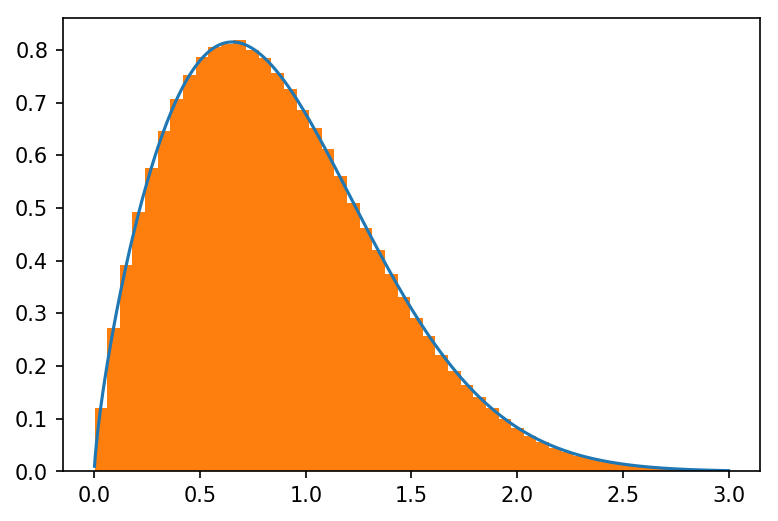

In [5]:
plt.plot(x, pdf)
_ = plt.hist(nakagami_samples, bins=50, density=True)

In [6]:
mu_list = np.linspace(.75, 4.25, 6)
alpha_list = np.linspace(1, 10, 20)
acceptance_fraction = np.zeros((len(mu_list), len(alpha_list)))
for i, mu in enumerate(mu_list):
    for j, alpha in enumerate(alpha_list):
        nakagami = AlphaMu(alpha, mu)
        _, af = rejection_sampling(nakagami.pdf, x, n_samples)
        acceptance_fraction[i, j] = np.mean(af)

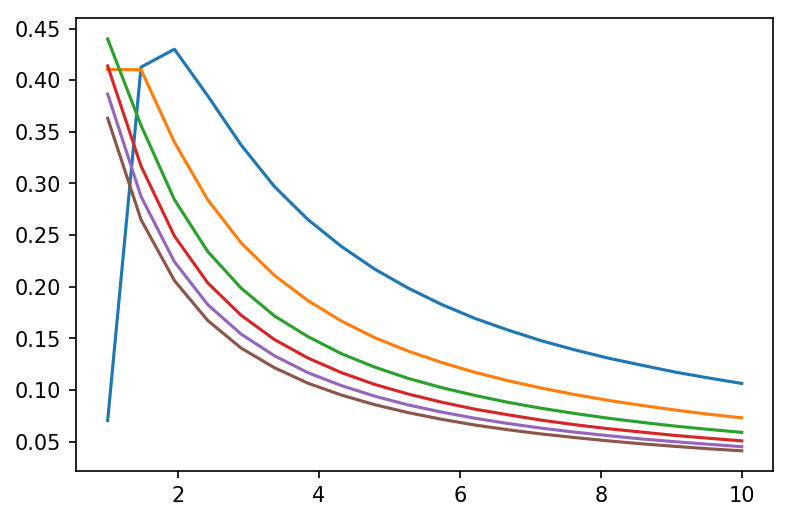

In [9]:
plt.plot(alpha_list, acceptance_fraction.T)